### AG News Dataset

### Import

In [3]:
# System dependencies
import os
import sys
import re

# Torch dependencies
import torch

# Data loaders
from torch.utils.data import DataLoader
from datasets import load_dataset

# Utils
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

### Data Config

In [4]:
dataset = load_dataset("ag_news")

train_data = dataset["train"]
test_data = dataset["test"]

print("Train samples:", len(train_data))
print("Test samples:", len(test_data))

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Train samples: 120000
Test samples: 7600


Inspecting the dataset

In [5]:
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 120000
})

In [7]:
train_data[0]

{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'label': 2}

In [13]:
label_map = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}

In [14]:
sample = train_data[0]

print("Label: ", label_map[sample["label"]])
print("Text: ", sample["text"])

Label:  Business
Text:  Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.


#### Class Distribution Analysis

In [ ]:
labels = [item["label"] for item in train_data]

# Counter for labels -> returns dict
label_counts = Counter(labels)

for label, count in label_counts.items():
    print(f"{label_map[label]}: {count}")

Business: 30000
Sci/Tech: 30000
Sports: 30000
World: 30000


In [ ]:
label_counts # dict

Counter({2: 30000, 3: 30000, 1: 30000, 0: 30000})

In [ ]:
# values 

label_counts.values() # distribution of labels 

dict_values([30000, 30000, 30000, 30000])

In [ ]:
# keys

label_counts.keys()

dict_keys([2, 3, 1, 0])

<BarContainer object of 4 artists>

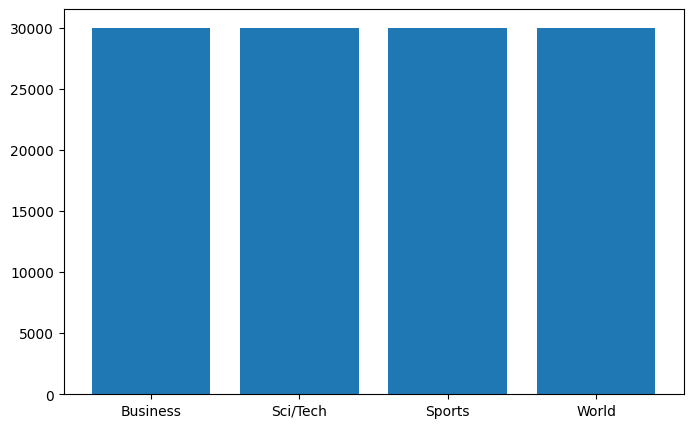

In [19]:
plt.figure(figsize=(8, 5))

# Iterate the dict to plot a bar chart
# Bar plot
plt.bar(
    [label_map[k] for k in label_counts.keys()],
    label_counts.values()
)


#### Text Analysis

* Text length analysis
  * Import for modelling the transformer pipeline.

In [26]:
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 120000
})

In [ ]:
# Tokenizer

# To get the length of each text sample from the dataset
def tokenize(text):
    # lower case and split the text into words
    return text.lower().split()

# Iterate the dataset and get each sample length
lengths = [len(tokenize(item["text"])) for item in train_data]

In [21]:
print("Min:", min(lengths))
print("Max:", max(lengths))
print("Mean:", np.mean(lengths))
print("Median:", np.median(lengths))

Min: 8
Max: 177
Mean: 37.84745
Median: 37.0


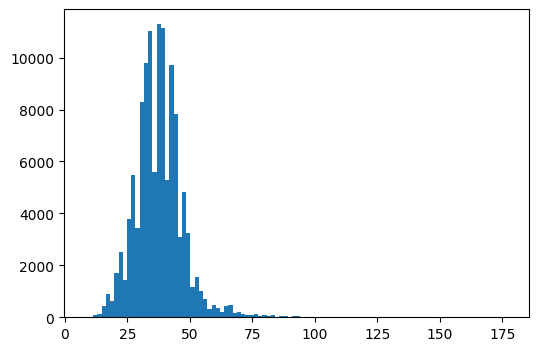

In [25]:
# plot
plt.figure(figsize=(6, 4))
plt.hist(lengths, bins=100)
plt.show()
# Plot the histogram